# Visualising a Hashtag-Network of TikTok

In [2]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 20.1 MB 4.1 MB/s            
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [4]:
# Importing the data
import json
from itertools import combinations
import numpy as np


with open('scraper/tiktok-fyp-videos.json') as file:
    database = json.load(file)
print(len(database.keys()), "videos in database")

ModuleNotFoundError: No module named 'numpy'

# Data Structure

In [19]:
import pprint
pprint.pprint(next(iter(database.values())))

{'BAInfo': '',
 'adAuthorization': False,
 'adLabelVersion': 0,
 'author': 'ruya.ege58',
 'authorId': '6637163004990275590',
 'authorPrivate': False,
 'authorSecId': 'MS4wLjABAAAAWDgAbA86O6n-Q2pvvbDn_UK1Zr-cNECo43FSb45uP1N1mDtphg9RRh_x7btbJaVp',
 'authorStats': {'diggCount': 2554,
                 'followerCount': 880800,
                 'followingCount': 1157,
                 'heart': 10900000,
                 'heartCount': 10900000,
                 'videoCount': 746},
 'avatarThumb': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/264e6fc83a0adb2be222490f43f1c79a~c5_100x100.jpeg?x-expires=1688626800&x-signature=NYY7GhaFo1d5qC%2B55UX5GckiTOs%3D',
 'capcutAnchors': [],
 'challenges': [{'coverLarger': '',
                 'coverMedium': '',
                 'coverThumb': '',
                 'desc': '',
                 'id': '1599100938960902',
                 'isCommerce': False,
                 'profileLarger': '',
                 'profileMedium': '',
                 '

# View statistics

In [20]:
video_views = []

for video in database.values():
    video_views.append(video["stats"]["playCount"])

# Calculate basic statistics
average = np.mean(video_views)
median = np.median(video_views)
print("Average views:", average)
print("Median views:", median)

Average views: 20519932.70042194
Median views: 6700000.0


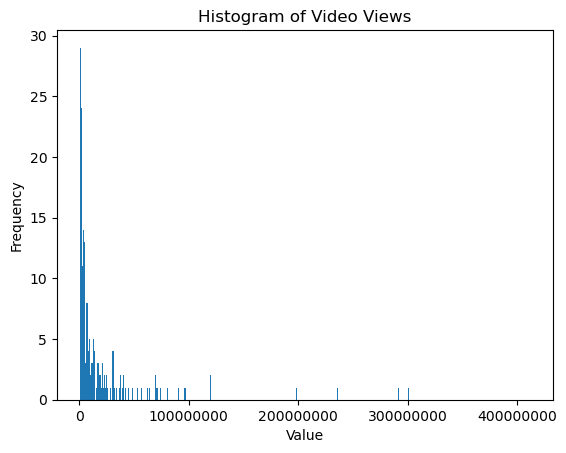

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.hist(video_views, bins=1000)

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Video Views')
#plt.xlim(left= 0, right=10000000)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.0f'))

# Display the histogram
plt.show()

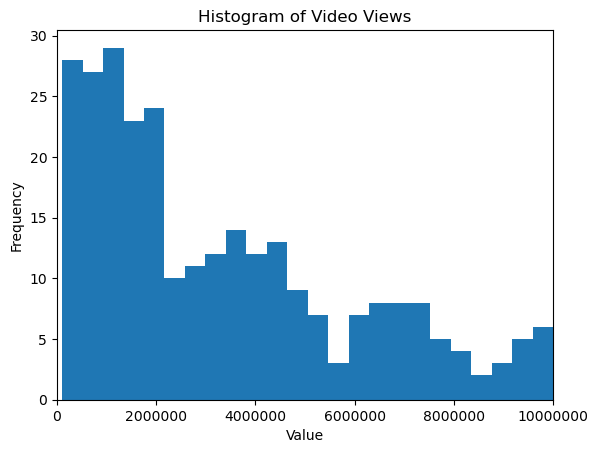

In [22]:
plt.hist(video_views, bins=1000)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Video Views')
# Limit the histogram to ignore outliers
plt.xlim(left= 0, right=10000000)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.0f'))
plt.show()

# Hashtags

In [23]:
videos_wo_hashtags = 0
hashtag_occurences = {}

for video in database.values():
    video_views.append(video["stats"]["playCount"])
    if "textExtra" in video:
        for hashtag in video["textExtra"]:
            if hashtag["hashtagName"] not in hashtag_occurences:
                hashtag_occurences[hashtag["hashtagName"]] = 1
            else:
                hashtag_occurences[hashtag["hashtagName"]] += 1
    else:
        videos_wo_hashtags += 1
                
hashtags_sorted = dict(sorted(hashtag_occurences.items(), key=lambda item: item[1], reverse=True))
print("There are", videos_wo_hashtags, "videos without hashtags (", videos_wo_hashtags*100/len(database.keys()), "%)")
print("The ten most common hashtags:")
print(list(hashtags_sorted)[:20])



There are 81 videos without hashtags ( 17.088607594936708 %)
The ten most common hashtags:
['fyp', '', 'viral', 'foryou', 'foryoupage', 'fy', 'fypシ', 'funny', 'funnyvideos', 'tiktok', 'fürdich', 'dog', 'trending', 'prank', 'football', 'asmr', 'fail', 'trend', 'pet', 'viralvideo']


In [24]:
hashtag_nodes = {}
hashtag_edges = []
for vid in database:
    listofhashtags = []
    if "textExtra" in database[vid]:
        for hashtag in database[vid]["textExtra"]:
            listofhashtags.append(hashtag["hashtagName"])
            if hashtag["hashtagName"] not in hashtag_nodes:
                hashtag_nodes[hashtag["hashtagName"]]=len(hashtag_nodes.keys())+1
        for combination in combinations(listofhashtags, 2):
            hashtag_edges.append([hashtag_nodes[combination[0]], hashtag_nodes[combination[1]]])

            

In [26]:
import pyvis
pyvis.options.Layout(improvedLayout=False)
net = pyvis.network.Network(notebook=False, cdn_resources="local")
net.force_atlas_2based()
node_count = 1
for hashtag in hashtag_nodes:
    net.add_node(node_count, label=hashtag)
    node_count+=1
net.add_edges(hashtag_edges)
net.show('all_hashtags.html')

In [35]:
exclude_hashtags = ['fyp', '', 'foryou', 'viral', 'foryoupage', 'fypシ', 'fy', 'fürdich', 'trending', 'foryoupage', 'tiktok', 'viralvideo', 'fürdichseiteシ', '4u']
hashtag_nodes = {}
hashtag_edges = []
for video in database.values():
    listofhashtags = []
    if "textExtra" in video:
        for hashtag in video["textExtra"]:
            if hashtag["hashtagName"] not in exclude_hashtags:
                listofhashtags.append(hashtag["hashtagName"])
                if hashtag["hashtagName"] not in hashtag_nodes:
                    hashtag_nodes[hashtag["hashtagName"]]=len(hashtag_nodes.keys())+1
        for combination in combinations(listofhashtags, 2):
            hashtag_edges.append([hashtag_nodes[combination[0]], hashtag_nodes[combination[1]]])

{'arapçaşarkı': 1, 'cake': 2, 'cakes': 3, 'bake': 4, 'baking': 5, 'food': 6, 'foodporn': 7, 'actor': 8, 'besniktafallari': 9, 'international': 10, 'kosova': 11, 'albania': 12, 'jasonstathammovie': 13, 'jasonstatham': 14, 'gta6': 15, 'ابن_زومبي': 16, 'abnzombie': 17, 'abn_zombie': 18, 'fürdichhhh': 19, 'fdss': 20, 'viraltt': 21, 'lustigevideos': 22, 'funnyvideos': 23, 'funnymoments': 24, 'deutschememes': 25, 'whatthehell': 26, 'memesextremlustig': 27, 'funnytiktokvideos': 28, 'funnyvideo': 29, 'dog': 30, 'dogsoftiktok': 31, 'duel': 32, 'fit': 33, 'dubai': 34, 'fitness': 35, 'abudhabi': 36, 'koweit': 37, 'plaquiste': 38, 'drywaller': 39, 'drywallers': 40, 'plaquistes': 41, 'haul': 42, 'fypage': 43, 'vlog': 44, 'tutorial': 45, 'nike': 46, 'louisajindaoui': 47, 'jindaouis': 48, 'shakira': 49, 'movie': 50, 'russenindeutschland': 51, 'russisch': 52, 'russendeutsche': 53, 'deutschrussen': 54, 'russischdeutsch': 55, 'deutschrussisch': 56, 'russian': 57, 'russaki': 58, 'goviral': 59, 'trend': 6

In [62]:

net = pyvis.network.Network(notebook=False, cdn_resources="local")

                
node_count = 1
for hashtag in hashtag_nodes:
    net.add_node(node_count, label=hashtag)
    node_count+=1
net.add_edges(hashtag_edges)
net.show_buttons(filter_="physics")
net.show('selected_hashtags.html')
